In [1]:
import glob
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import nibabel as nib
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical


In [2]:
scaler=MinMaxScaler()

In [3]:
TRAINPATH='/content/drive/MyDrive/ImageData/MICCAI_BraTS2020_TrainingData'

In [4]:
tstImg=nib.load('/content/drive/MyDrive/ImageData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_355/BraTS20_Training_355_flair.nii').get_fdata()
print(tstImg.max())
tstImg=scaler.fit_transform(tstImg.reshape(-1,tstImg.shape[-1])).reshape(tstImg.shape)

1854.603271484375


In [5]:
print(tstImg.max())

1.0


In [6]:
tstImg_t1ce=nib.load('/content/drive/MyDrive/ImageData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_355/BraTS20_Training_355_t1ce.nii').get_fdata()
tstImg_t1ce=scaler.fit_transform(tstImg_t1ce.reshape(-1,tstImg_t1ce.shape[-1])).reshape(tstImg_t1ce.shape)

tstImg_t1=nib.load('/content/drive/MyDrive/ImageData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_355/BraTS20_Training_355_t1.nii').get_fdata()
tstImg_t1=scaler.fit_transform(tstImg_t1.reshape(-1,tstImg_t1.shape[-1])).reshape(tstImg_t1.shape)

tstImg_t2=nib.load('/content/drive/MyDrive/ImageData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_355/BraTS20_Training_355_t2.nii').get_fdata()
tstImg_t2=scaler.fit_transform(tstImg_t2.reshape(-1,tstImg_t2.shape[-1])).reshape(tstImg_t2.shape)



In [7]:
tstMask=nib.load('/content/drive/MyDrive/ImageData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_355/BraTS20_Training_355_seg.nii').get_fdata()
print(np.unique(tstMask))

[0. 1. 2. 4.]


In [8]:
tstMask=tstMask.astype(np.uint8)
print(np.unique(tstMask))

[0 1 2 4]


In [9]:
tstMask[tstMask==4]=3
print(np.unique(tstMask))

[0 1 2 3]


In [10]:
import random

In [11]:
tstMask.shape,tstImg.shape

((240, 240, 155), (240, 240, 155))

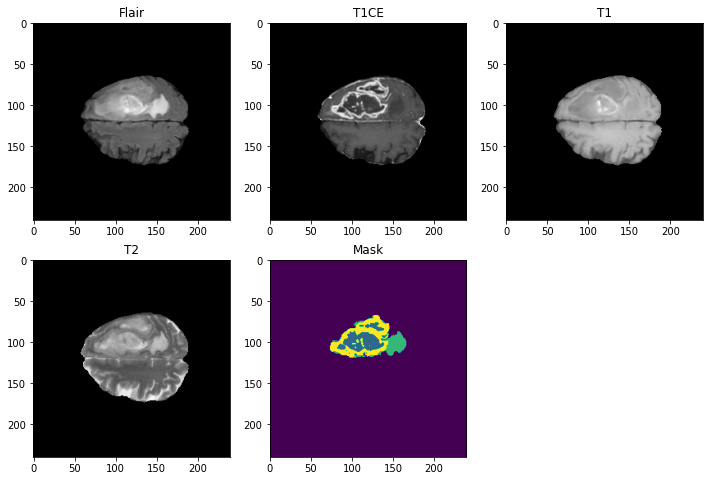

In [12]:
randSlice=random.randint(0,tstMask.shape[-1])
plt.figure(figsize=(12,8))
plt.subplot(231)
plt.imshow(tstImg[:,:,randSlice],cmap='gray')
plt.title('Flair')
plt.subplot(232)
plt.imshow(tstImg_t1ce[:,:,randSlice],cmap='gray')
plt.title('T1CE')
plt.subplot(233)
plt.imshow(tstImg_t1[:,:,randSlice],cmap='gray')
plt.title('T1')
plt.subplot(234)
plt.imshow(tstImg_t2[:,:,randSlice],cmap='gray')
plt.title('T2')

plt.subplot(235)
plt.imshow(tstMask[:,:,randSlice])
plt.title('Mask')
plt.show()

In [13]:
combined_x=np.stack([tstImg,tstImg_t1ce,tstImg_t2],axis=3)
combined_x=combined_x[56:184,56:184,13:141]
# combined_x.shape

In [14]:
tstMask=tstMask[56:184,56:184,13:141]

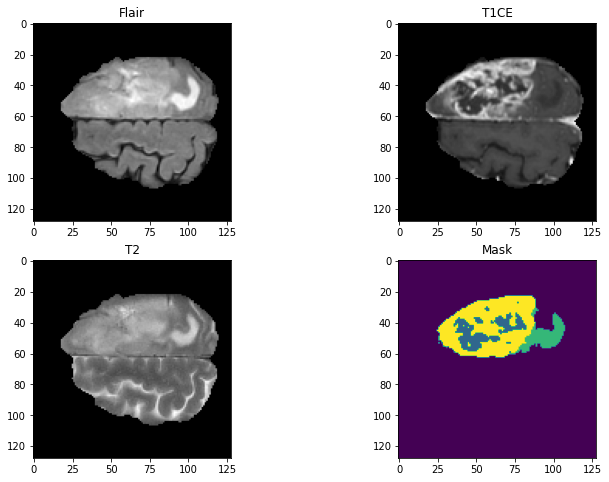

In [15]:
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.imshow(combined_x[:,:,randSlice,0],cmap='gray')
plt.title('Flair')
plt.subplot(222)
plt.imshow(combined_x[:,:,randSlice,1],cmap='gray')
plt.title('T1CE')
plt.subplot(223)
plt.imshow(combined_x[:,:,randSlice,2],cmap='gray')
plt.title('T2')

plt.subplot(224)
plt.imshow(tstMask[:,:,randSlice])
plt.title('Mask')
plt.show()

In [ ]:
# np.save('/content/drive/MyDrive/ImageData/combined_attempt2.npy',combined_x)

In [16]:
myImg=np.load('/content/drive/MyDrive/ImageData/combined_attempt2.npy')
tstMask=to_categorical(tstMask,num_classes=4)

In [17]:
myImg.shape

(128, 128, 128, 3)

In [18]:
combined_x==myImg.all()

array([[[[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        ...,

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ T

In [19]:
tstMask.shape

(128, 128, 128, 4)

In [20]:
t2_list=sorted(glob.glob('/content/drive/MyDrive/ImageData/MICCAI_BraTS2020_TrainingData/*/*t2.nii'))
t1ce_list=sorted(glob.glob('/content/drive/MyDrive/ImageData/MICCAI_BraTS2020_TrainingData/*/*t1ce.nii'))
flair_list=sorted(glob.glob('/content/drive/MyDrive/ImageData/MICCAI_BraTS2020_TrainingData/*/*flair.nii'))
mask_list=sorted(glob.glob('/content/drive/MyDrive/ImageData/MICCAI_BraTS2020_TrainingData/*/*seg.nii'))

In [21]:
# CHecking
for i in flair_list:
  print(i)

/content/drive/MyDrive/ImageData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_flair.nii
/content/drive/MyDrive/ImageData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_002/BraTS20_Training_002_flair.nii
/content/drive/MyDrive/ImageData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_003/BraTS20_Training_003_flair.nii
/content/drive/MyDrive/ImageData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_004/BraTS20_Training_004_flair.nii
/content/drive/MyDrive/ImageData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_005/BraTS20_Training_005_flair.nii
/content/drive/MyDrive/ImageData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_006/BraTS20_Training_006_flair.nii
/content/drive/MyDrive/ImageData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_007/BraTS20_Training_007_flair.nii
/content/drive/MyDrive/ImageData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_008/BraTS20_Training_008_flair.nii
/content/drive/MyDrive/ImageData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_

In [22]:
print(len(t1ce_list)==len(t2_list)==len(flair_list)==len(mask_list))

True


In [23]:
len(t2_list)

369

**Data Prep and Splitting Run carefully**

In [37]:
for i in range(len(t2_list)):
  temp_t2=nib.load(t2_list[i]).get_fdata()
  temp_t2=scaler.fit_transform(temp_t2.reshape(-1,temp_t2.shape[-1])).reshape(temp_t2.shape)

  temp_flair=nib.load(flair_list[i]).get_fdata()
  temp_flair=scaler.fit_transform(temp_flair.reshape(-1,temp_flair.shape[-1])).reshape(temp_flair.shape)

  temp_t1ce=nib.load(t1ce_list[i]).get_fdata()
  temp_t1ce=scaler.fit_transform(temp_t1ce.reshape(-1,temp_t1ce.shape[-1])).reshape(temp_t1ce.shape)

  temp_mask=nib.load(mask_list[i]).get_fdata()
  # print(temp_t2.shape,temp_flair.shape,temp_t1ce.shape)


  # Converting the float to unsigned 8-bit and changing label 4 to 3 as 3 is missing.
  temp_mask=temp_mask.astype(np.uint8)
  temp_mask[temp_mask==4]=3

  temp_combined_images=np.stack([temp_flair,temp_t1ce,temp_t2],axis=3)

  # Crop
  temp_combined_images=temp_combined_images[56:184,56:184,13:141]
  temp_mask=temp_mask[56:184,56:184,13:141]


  # Additional step where we remove uneccessary data(i.e., the images where the annotation is really less, means the max. aprt is 0 labelled which may be lead to wrong training that may result to no segmentation)
  val,counts=np.unique(temp_mask,return_counts=True)
  
  if (1-(counts[0]/counts.sum()))>0.01:
    print("I am useful so I am deserve to be saved")
    temp_mask=to_categorical(temp_mask,num_classes=4)
    np.save('/content/drive/MyDrive/Work/Dataset/total_train/img/image'+str(i)+'.npy',temp_combined_images)
    np.save('/content/drive/MyDrive/Work/Dataset/total_train/mask/mask'+str(i)+'.npy',temp_mask)
  else:
    print("I am useless so I am not being saved ")

I am useful so I am deserve to be saved
I am useful so I am deserve to be saved
I am useful so I am deserve to be saved
I am useful so I am deserve to be saved
I am useless so I am not being saved 
I am useful so I am deserve to be saved
I am useful so I am deserve to be saved
I am useful so I am deserve to be saved
I am useful so I am deserve to be saved
I am useful so I am deserve to be saved
I am useful so I am deserve to be saved
I am useful so I am deserve to be saved
I am useful so I am deserve to be saved
I am useful so I am deserve to be saved
I am useful so I am deserve to be saved
I am useful so I am deserve to be saved
I am useful so I am deserve to be saved
I am useful so I am deserve to be saved
I am useful so I am deserve to be saved
I am useful so I am deserve to be saved
I am useful so I am deserve to be saved
I am useful so I am deserve to be saved
I am useful so I am deserve to be saved
I am useful so I am deserve to be saved
I am useful so I am deserve to be saved
I 

In [38]:
import os

In [39]:
print(len(os.listdir('/content/drive/MyDrive/Work/Dataset/total_train/img')))
print(len(os.listdir('/content/drive/MyDrive/Work/Dataset/total_train/mask')))

344
344


In [40]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
import splitfolders 

In [42]:
# Probable error
input_folder='/content/drive/MyDrive/Work/Dataset/total_train'
output_folder='/content/drive/MyDrive/Work/Dataset/Split'
splitfolders.ratio(input_folder,output_folder,seed=42,ratio=(.85,.15),group_prefix=None)

Copying files: 688 files [11:37,  1.01s/ files]


In [43]:
print(len(os.listdir('/content/drive/MyDrive/Work/Dataset/Split/train/img')))
print(len(os.listdir('/content/drive/MyDrive/Work/Dataset/Split/train/mask')))
print(len(os.listdir('/content/drive/MyDrive/Work/Dataset/Split/val/img')))
print(len(os.listdir('/content/drive/MyDrive/Work/Dataset/Split/val/mask')))

292
292
52
52


In [44]:
testI=np.load('/content/drive/MyDrive/Work/Dataset/Split/train/img/image0.npy')
testM=np.load('/content/drive/MyDrive/Work/Dataset/Split/train/mask/mask0.npy')
print(testI.shape,testM.shape)

(128, 128, 128, 3) (128, 128, 128, 4)
